In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

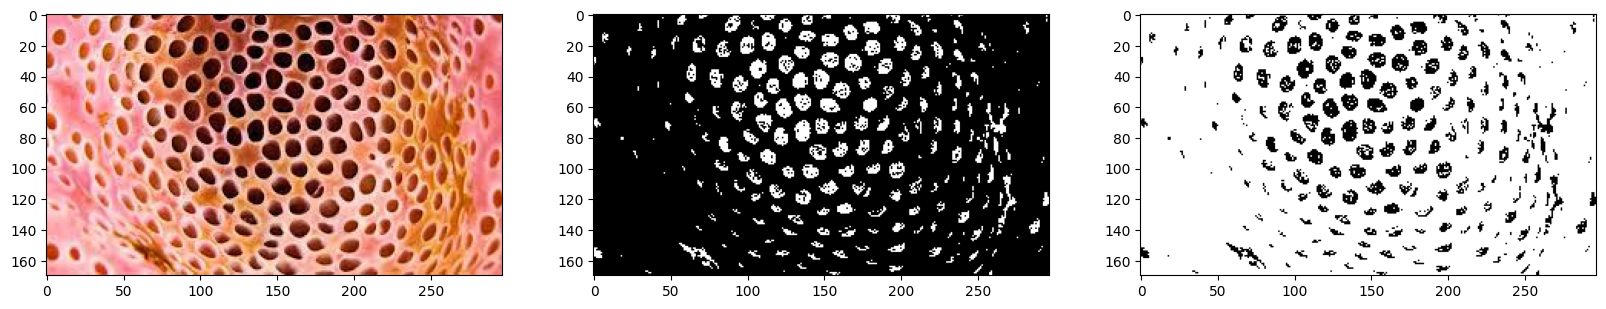

In [9]:
image = cv2.imread("./imgs/holes1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 12, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
# invert the image
bw = cv2.bitwise_not(bw)
# convert to 0 and 1 values
bw[bw > 0] = 1

bw_inverted = cv2.bitwise_not(bw)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(image)
ax[1].imshow(bw, cmap="gray")
ax[2].imshow(bw_inverted, cmap="gray")
plt.show()

Using num py

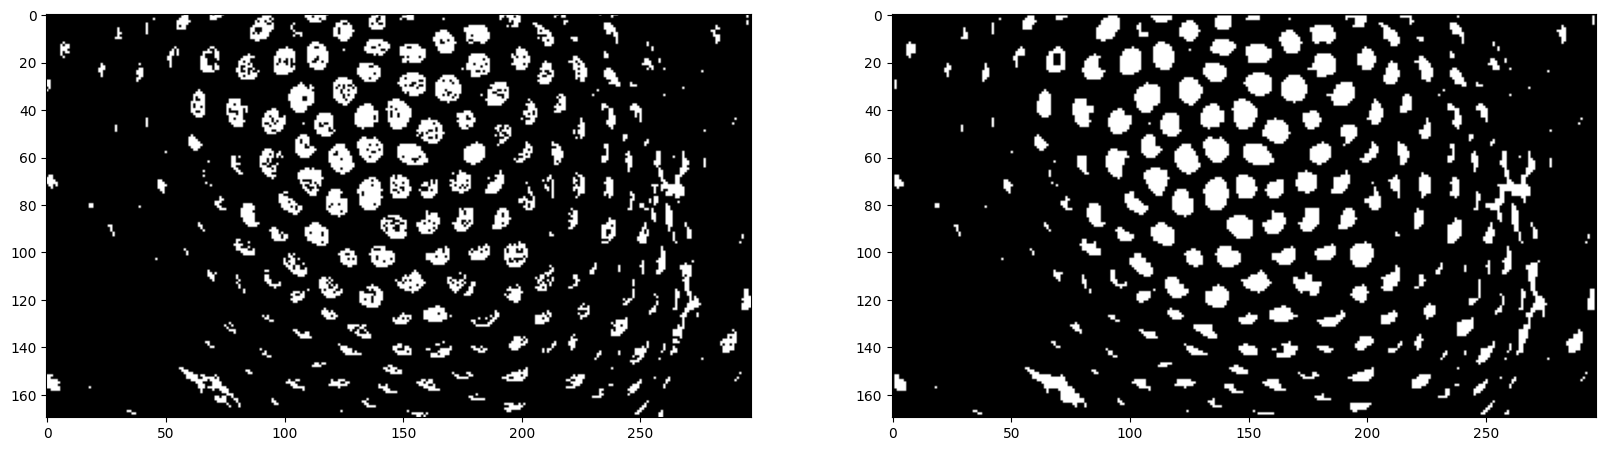

In [10]:
# or
def close_holes(img:np.array,kernel:np.array)-> np.array:
    def dilate(image, kernel):
        dilated_image = np.zeros_like(image)
        padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                dilated_image[i, j] = np.max(padded_image[i:i+3, j:j+3] * kernel)
        return dilated_image

    def erode(image, kernel):
        eroded_image = np.zeros_like(image)
        padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                eroded_image[i, j] = np.min(padded_image[i:i+3, j:j+3] * kernel)
        return eroded_image


    dilated = dilate(img, kernel)
    closed = erode(dilated, kernel)
    closed = np.bitwise_not(closed)

    return closed

kernel = np.ones((3,3),np.uint8)
closing = close_holes(bw, kernel)
closing = np.bitwise_not(closing)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(bw, cmap="gray")
ax[1].imshow(closing, cmap="gray")
plt.show()

Using CV2

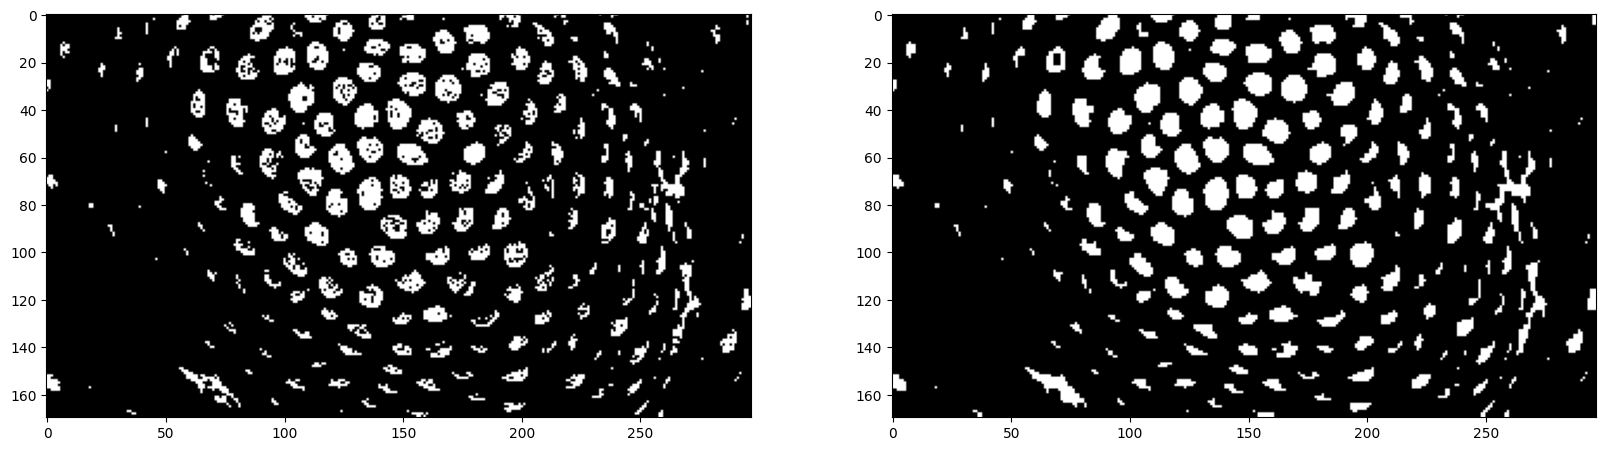

In [11]:
#Fill the holes in the bw image
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(bw, cmap="gray")
ax[1].imshow(closing, cmap="gray")
plt.show()